Nodes: 115
Edges: 613


C:\Users\Matilde\AppData\Local\Temp\ipykernel_268\1919855436.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('tab20', len(unique_labels))


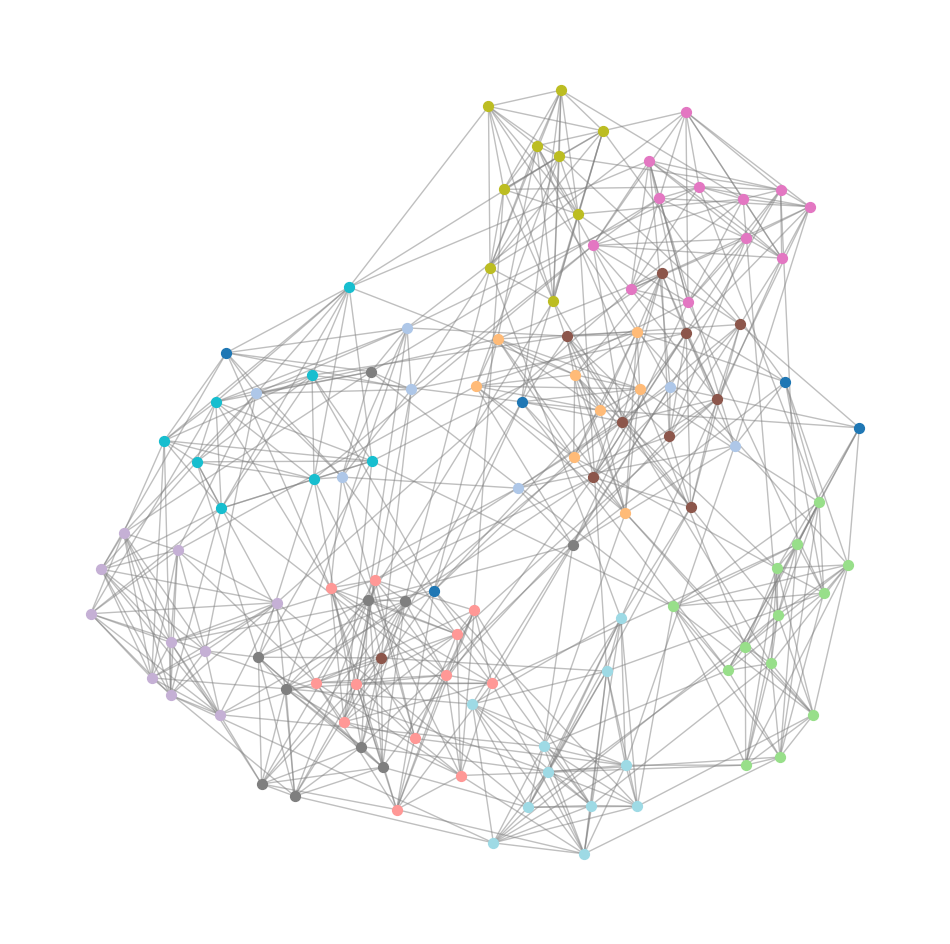

Nodes: 62
Edges: 159


C:\Users\Matilde\AppData\Local\Temp\ipykernel_268\1919855436.py:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('tab20', len(unique_labels))


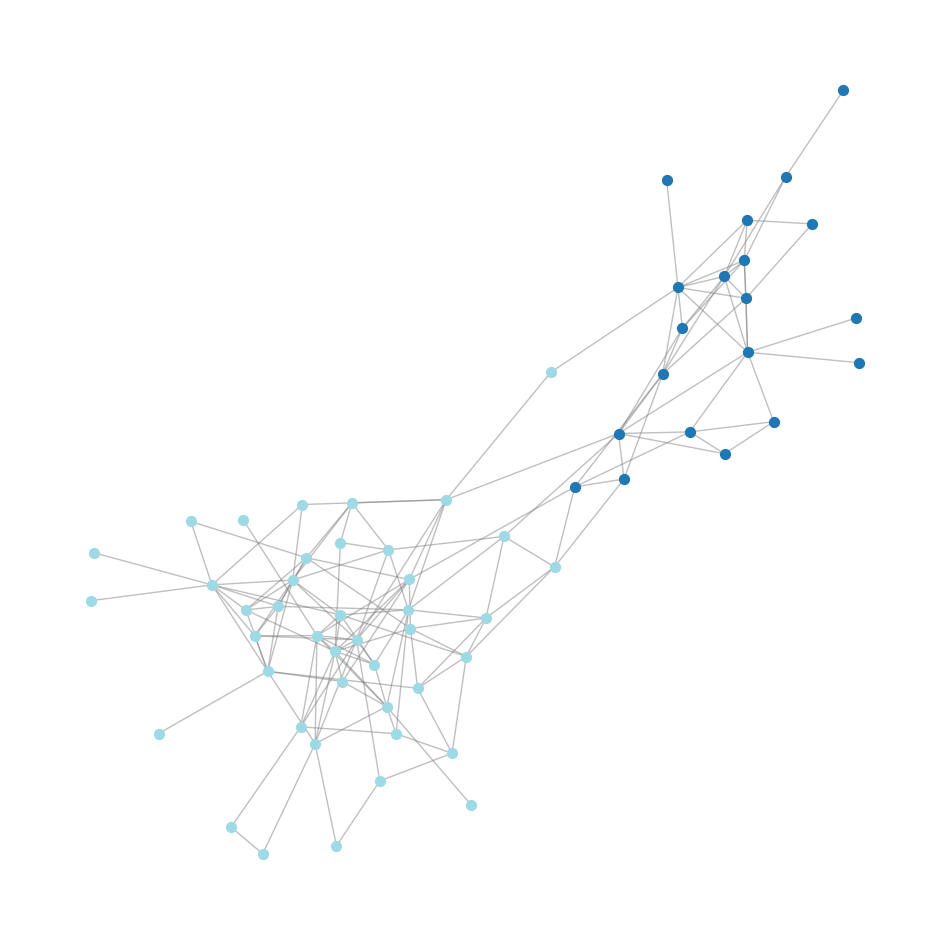

Nodes: 34
Edges: 78


C:\Users\Matilde\AppData\Local\Temp\ipykernel_268\1919855436.py:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('tab20', len(unique_labels))


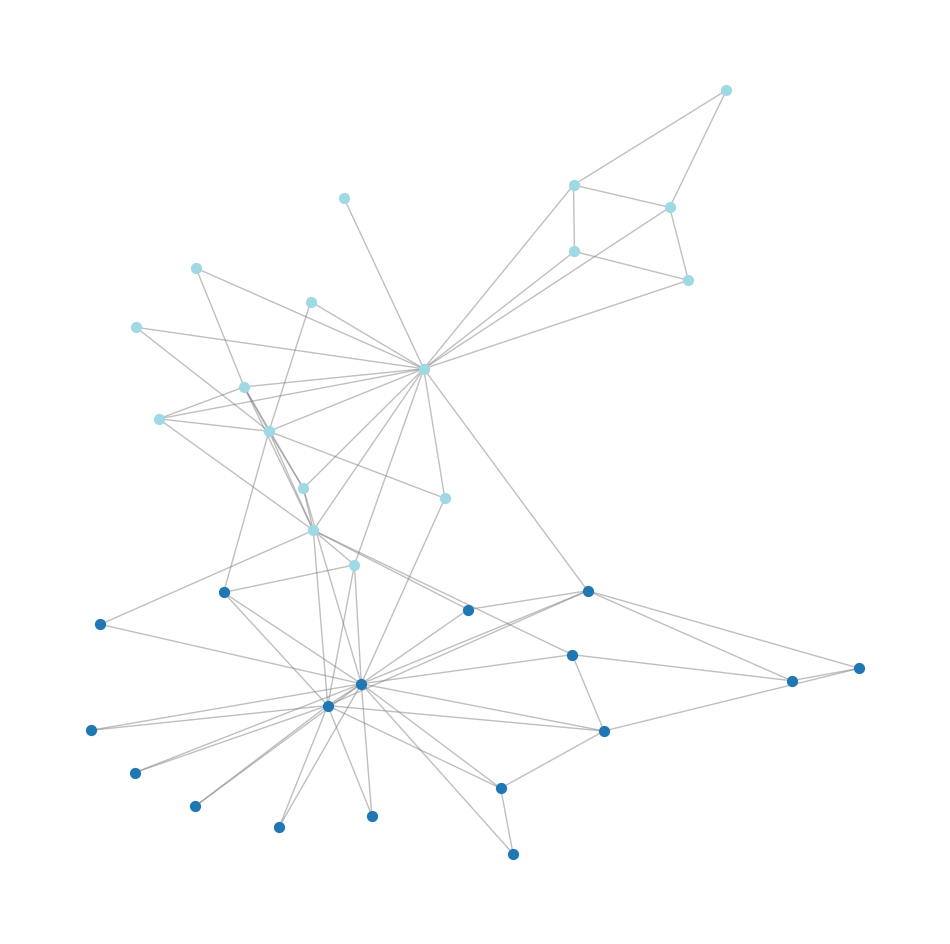

Computing: 100%|████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 130.61it/s]


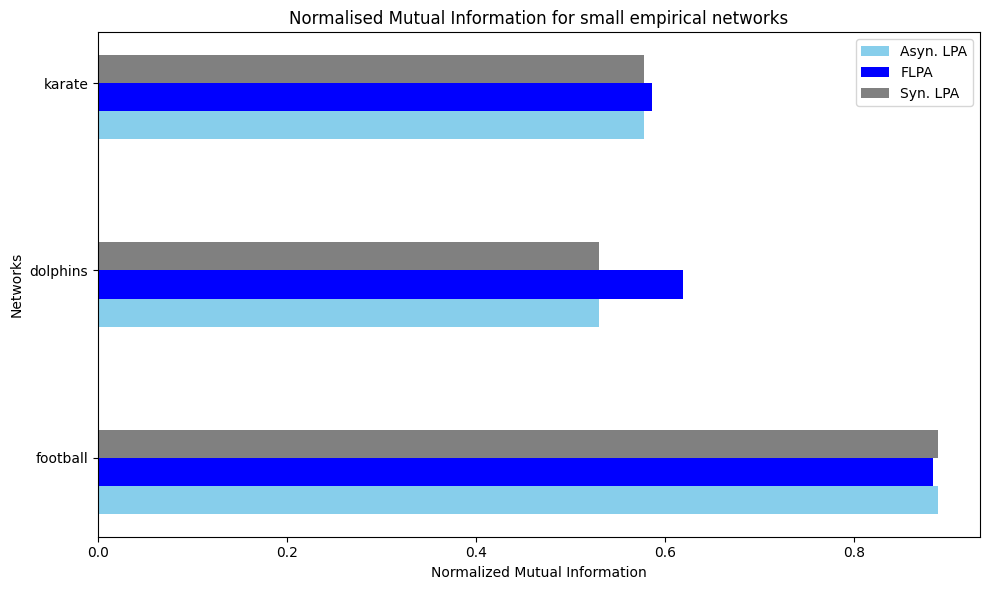

In [1]:
#Computing the NMI for three small empirical networks by confronting
#the real communities with the one founded by the LPA asyn., LPA syn., FLPA

import networkx as nx
from sklearn.metrics import normalized_mutual_info_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from tqdm import tqdm

networks=["football","dolphins","karate"]
##########################################################################################
#Saving the graph from the graphml file
G_f= nx.read_graphml("SmallEmpNet/football.graphml")
print(f"Nodes: {G_f.number_of_nodes()}")
print(f"Edges: {G_f.number_of_edges()}")

#Saving the known communities
true_labels_f = [data.get('value', f"Node {node}") for node, data in G_f.nodes(data=True)]
node_to_label = {node: label for node, label in zip(G_f.nodes(), true_labels_f)}

#Each community has a color
unique_labels = list(set(true_labels_f))
colormap = plt.cm.get_cmap('tab20', len(unique_labels))  
label_to_color = {label: mcolors.rgb2hex(colormap(i)) for i, label in enumerate(unique_labels)}  

#Drawing graph with spring layout
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_f, seed=42)  

#Drawing nodes
for node in G_f.nodes():
    nx.draw_networkx_nodes(
        G_f, pos,
        nodelist=[node],
        node_color=[label_to_color[node_to_label[node]]],
        node_size=50
    )

#Drawing edges
nx.draw_networkx_edges(G_f, pos, edge_color='gray', alpha=0.5)

plt.axis('off')
plt.savefig("Ridic_football.png")
plt.show()
###########################################################################################
#Saving the graph from the graphml file
G_d= nx.read_graphml("SmallEmpNet/dolphins.graphml")
print(f"Nodes: {G_d.number_of_nodes()}")
print(f"Edges: {G_d.number_of_edges()}")


#Saving the known communities
partitions = {"Beak": 1, "Beescratch": 0, "Bumper": 1, "CCL": 1, "Cross": 1,"DN16": 0, "DN21": 0, "DN63": 0, "Double": 1, "Feather": 0,
    "Fish": 1, "Five": 1, "Fork": 1, "Gallatin": 0, "Grin": 1,"Haecksel": 1, "Hook": 1, "Jet": 0, "Jonah": 1, "Knit": 0,
    "Kringel": 1, "MN105": 1, "MN23": 0, "MN60": 1, "MN83": 1,"Mus": 0, "Notch": 0, "Number1": 0, "Oscar": 1, "Patchback": 1,
    "PL": 1, "Quasi": 0, "Ripplefluke": 0, "Scabs": 1, "Shmuddel": 1,"SMN5": 1, "SN100": 1, "SN4": 1, "SN63": 1, "SN89": 1,
    "SN9": 1, "SN90": 0, "SN96": 1, "Stripes": 1, "Thumper": 1,"Topless": 1, "TR120": 1, "TR77": 1, "TR82": 0, "TR88": 1,
    "TR99": 1, "Trigger": 1, "TSN103": 1, "TSN83": 1, "Upbang": 0,"Vau": 1, "Wave": 0, "Web": 0, "Whitetip": 1, "Zap": 1,
    "Zig": 0, "Zipfel": 1}
node_labels = [data.get('label', f"Node {node}") for node, data in G_d.nodes(data=True)]
true_labels_d = [partitions[node] for node in node_labels]
node_to_label = {node: label for node, label in zip(G_d.nodes(), true_labels_d)}

#Each community has a color
unique_labels = list(set(true_labels_d))  
colormap = plt.cm.get_cmap('tab20', len(unique_labels)) 
label_to_color = {label: mcolors.rgb2hex(colormap(i)) for i, label in enumerate(unique_labels)}  

#Drawing graph with spring layout
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_d, seed=42)

#Drawing nodes
for node in G_d.nodes():
    nx.draw_networkx_nodes(
        G_d, pos,
        nodelist=[node],
        node_color=[label_to_color[node_to_label[node]]],
        node_size=50
    )

#Drawing edges
nx.draw_networkx_edges(G_d, pos, edge_color='gray', alpha=0.5)

plt.axis('off')
plt.savefig("Ridic_dolphins.png")
plt.show()
###########################################################################################
#Saving the graph from the graphml file
G_k= nx.read_graphml("SmallEmpNet/karate.graphml")
print(f"Nodes: {G_k.number_of_nodes()}")
print(f"Edges: {G_k.number_of_edges()}")

#Saving the known communities
true_labels_k = [data.get('groups', f"Node {node}") for node, data in G_k.nodes(data=True)]
node_to_label = {node: label for node, label in zip(G_k.nodes(), true_labels_k)}

#Each community has a color
unique_labels = list(set(true_labels_k)) 
colormap = plt.cm.get_cmap('tab20', len(unique_labels)) 
label_to_color = {label: mcolors.rgb2hex(colormap(i)) for i, label in enumerate(unique_labels)} 

#Drawing graph with spring layout
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_k, seed=42) 

#Drawing nodes
for node in G_k.nodes():
    nx.draw_networkx_nodes(
        G_k, pos,
        nodelist=[node],
        node_color=[label_to_color[node_to_label[node]]],
        node_size=50
    )

#Drawing edges
nx.draw_networkx_edges(G_k, pos, edge_color='gray', alpha=0.5)

plt.axis('off')
plt.savefig("Ridic_karate.png")
plt.show()
###########################################################################################
#Initializing the variables
G=[G_f,G_d,G_k]
true_labels=[true_labels_f,true_labels_d,true_labels_k]
NMI_flpa_av=[]
NMI_lpa_asyn_av=[]
NMI_lpa_syn_av=[]

for i in range(3):
    NMI_flpa=[]
    NMI_lpa_asyn=[]
    NMI_lpa_syn=[]
    
    for k in tqdm(range(500), desc="Computing"):
        #Computing the communities for each algorithm
        communities_lpa_asyn = list(nx.community.asyn_lpa_communities(G[i]))
        communities_flpa=list(nx.community.fast_label_propagation_communities(G[i]))
        communities_lpa_syn = list(nx.community.label_propagation_communities(G[i]))
        nodes = list(G[i].nodes())
        
        #Creating a dictionary to map nodes to the communities for each algorithm
        community_labels_lpa_asyn = {}
        for j, community in enumerate(communities_lpa_asyn):
            for node in community:
                community_labels_lpa_asyn[node] = j 
        pred_labels_lpa_asyn = [community_labels_lpa_asyn[node] for node in nodes]
    
        community_labels_lpa_syn = {}
        for j, community in enumerate(communities_lpa_syn):
            for node in community:
                community_labels_lpa_syn[node] = j 
        pred_labels_lpa_syn = [community_labels_lpa_syn[node] for node in nodes]
                
        community_labels_flpa = {}
        for j, community in enumerate(communities_flpa):
            for node in community:
                community_labels_flpa[node] = j 
        pred_labels_flpa = [community_labels_flpa[node] for node in nodes]
    
        NMI_flpa.append(normalized_mutual_info_score(true_labels[i],pred_labels_flpa))
        NMI_lpa_asyn.append(normalized_mutual_info_score(true_labels[i],pred_labels_lpa_asyn))
        NMI_lpa_syn.append(normalized_mutual_info_score(true_labels[i],pred_labels_lpa_syn))

    #Computing averages for each algorithm
    NMI_flpa_av.append(np.mean(NMI_flpa))
    NMI_lpa_asyn_av.append(np.mean(NMI_lpa_asyn))
    NMI_lpa_syn_av.append(np.mean(NMI_lpa_asyn))

#Creating the bar graph
bar_width = 0.15
y_pos = np.arange(len(networks))  

plt.figure(figsize=(10, 6))
plt.barh(y_pos - bar_width*1.5, NMI_lpa_asyn_av, height=bar_width, label="Asyn. LPA", color='skyblue')
plt.barh(y_pos - bar_width*0.5, NMI_flpa_av, height=bar_width, label="FLPA", color='blue')
plt.barh(y_pos + bar_width*0.5, NMI_lpa_syn_av, height=bar_width, label="Syn. LPA", color='gray')

plt.yticks(y_pos, networks)
plt.xlabel("Normalized Mutual Information")
plt.ylabel("Networks")
plt.title("Normalised Mutual Information for small empirical networks")
plt.legend()
plt.tight_layout()
plt.savefig("NMI_smallEmp.png")
plt.show()
    